# A Neural Network that uses - JHU Data 
---

## What we will work with ?
---

Data will have all the county regions each representing a data point. <br>
Variables will be ranging from age groups to number of icu beds and ventilators. <br>
We want to see if this model can predict a state with given capacity, of becoming a next hotspot. <br>

# Perform Standard Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Let's create a model
---

## Finalized Layers : Leaky Relu
| L1 | L2 | L3 |
| -- | -- | -- |
| 120 | 60 | 30 |


In [2]:
l1 = input("Number of Layers in L 1 : ")
l2 = input("Number of Layers in L 2 : ")
l3 = input("Number of Layers in L 3 : ")
# n_iter = input("Number of Epochs : ")

l1 = int(l1)
l2 = int(l2)
l3 = int(l3)
# n_iter = int(n_iter)
n_iter = 18000

Number of Layers in L 1 : 120
Number of Layers in L 2 : 60
Number of Layers in L 3 : 30


In [3]:
class Model(nn.Module):
    def __init__(self, in_features=10, l1=l1, l2=l2, l3=l3, out_features=1):
        
        super().__init__()
        # input layer
        self.fc1 = nn.Linear(in_features, l1)
        # hidden layer 1
        self.fc2 = nn.Linear(l1, l2)
        # hidden layer 2
        self.fc3 = nn.Linear(l2, l3)
        #output layer
        self.out = nn.Linear(l3, out_features)
        
          
    def forward(self, x):
        
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        
        x = self.out(x)
        
        return x

# Pre-processing Dataset

In [4]:
train_d = pd.read_csv("../data_data/net_train_data.csv")
test_d = pd.read_csv("../data_data/net_test_data.csv")

train_d

,train1,train2,train3,train4,train5,train6,train7,train8,train9,train10,train11,train12
0,0.220805,0.041667,0.231183,0.097261,0.002367,0.002307,0.001736,0.105372,0.000698,0.001755,0.000996,24
1,0.527069,0.117647,0.123656,0.213340,0.020124,0.019938,0.012884,0.212462,0.008248,0.015630,0.010219,17
2,0.654822,0.027397,0.145161,0.161684,0.024017,0.019719,0.017940,0.146523,0.000983,0.018580,0.011735,73
3,0.854589,0.042793,0.080645,0.177195,0.026072,0.037955,0.031450,0.212993,0.001118,0.041942,0.040988,444
4,0.746566,0.068627,0.166667,0.310811,0.075807,0.046798,0.066799,0.375943,0.000916,0.057752,0.033192,2958
...,...,...,...,...,...,...,...,...,...,...,...,...
1202,0.710668,0.022222,0.086022,0.219599,0.013275,0.009777,0.010730,0.191707,0.001492,0.015585,0.026816,45
1203,0.858804,0.062500,0.198925,0.120880,0.005553,0.003405,0.006243,0.145416,0.001574,0.005996,0.008407,16
1204,0.363491,0.022727,0.166667,0.185869,0.010246,0.006646,0.008007,0.143922,0.001094,0.008342,0.010728,44
1205,0.382894,0.126984,0.220430,0.242666,0.005963,0.001703,0.005047,0.181401,0.001118,0.004222,0.003148,189


In [5]:
X_train = train_d.iloc[:,1:11]
X_train

y_train = train_d.iloc[:,11:12]
y_train


X_test = test_d.iloc[:,1:11]
X_test

y_test = test_d.iloc[:,11:12]
y_test

X_train

,train2,train3,train4,train5,train6,train7,train8,train9,train10,train11
0,0.041667,0.231183,0.097261,0.002367,0.002307,0.001736,0.105372,0.000698,0.001755,0.000996
1,0.117647,0.123656,0.213340,0.020124,0.019938,0.012884,0.212462,0.008248,0.015630,0.010219
2,0.027397,0.145161,0.161684,0.024017,0.019719,0.017940,0.146523,0.000983,0.018580,0.011735
3,0.042793,0.080645,0.177195,0.026072,0.037955,0.031450,0.212993,0.001118,0.041942,0.040988
4,0.068627,0.166667,0.310811,0.075807,0.046798,0.066799,0.375943,0.000916,0.057752,0.033192
...,...,...,...,...,...,...,...,...,...,...
1202,0.022222,0.086022,0.219599,0.013275,0.009777,0.010730,0.191707,0.001492,0.015585,0.026816
1203,0.062500,0.198925,0.120880,0.005553,0.003405,0.006243,0.145416,0.001574,0.005996,0.008407
1204,0.022727,0.166667,0.185869,0.010246,0.006646,0.008007,0.143922,0.001094,0.008342,0.010728
1205,0.126984,0.220430,0.242666,0.005963,0.001703,0.005047,0.181401,0.001118,0.004222,0.003148


X_train = X.iloc[0:250, :]
X_test = X.iloc[250:300, :]

y_train = y.iloc[0:250, :]
y_test = y.iloc[250:300, :]

In [6]:
X_train = X_train.to_numpy(dtype=float)
X_test = X_test.to_numpy(dtype=float)

y_train = y_train.to_numpy(dtype=float)
y_test = y_test.to_numpy(dtype=float)

In [7]:
# norm = np.linalg.norm(X_train)
# X_train = X_train / norm

# norm = np.linalg.norm(X_test)
# X_test = X_test / norm

# norm = np.linalg.norm(y_train)
# y_train = y_train / norm

# norm = np.linalg.norm(y_test)
# y_test = y_test / norm

In [8]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

X_train

tensor([[0.0417, 0.2312, 0.0973,  ..., 0.0007, 0.0018, 0.0010],
        [0.1176, 0.1237, 0.2133,  ..., 0.0082, 0.0156, 0.0102],
        [0.0274, 0.1452, 0.1617,  ..., 0.0010, 0.0186, 0.0117],
        ...,
        [0.0227, 0.1667, 0.1859,  ..., 0.0011, 0.0083, 0.0107],
        [0.1270, 0.2204, 0.2427,  ..., 0.0011, 0.0042, 0.0031],
        [0.0667, 0.1237, 0.1696,  ..., 0.0010, 0.0127, 0.0127]])

# Prepare DataLoader
---
For this analysis we don't need to create a Dataset object. <br>
But we should take advantage of PyTorch's DataLoader tool. <br>
Even though our dataset is small, we'll load it into our model in two batches. <br>
This technique becomes very helpful with large datasets.

In [9]:
trainloader = DataLoader(X_train, batch_size=100, shuffle=False)

testloader = DataLoader(X_test, batch_size=10, shuffle=False)

In [10]:
# For Redo
torch.manual_seed(44)
model = Model()

In [11]:
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
epochs = n_iter
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    loss1 = math.sqrt(math.sqrt(loss))
    losses.append(loss1)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():1.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 947.39447021
epoch: 11  loss: 947.26251221
epoch: 21  loss: 947.07373047
epoch: 31  loss: 946.67181396
epoch: 41  loss: 945.82623291
epoch: 51  loss: 944.16082764
epoch: 61  loss: 941.13677979
epoch: 71  loss: 936.13702393
epoch: 81  loss: 928.55651855
epoch: 91  loss: 918.44677734
epoch: 101  loss: 906.66961670
epoch: 111  loss: 894.52020264
epoch: 121  loss: 884.33099365
epoch: 131  loss: 877.42285156
epoch: 141  loss: 873.56091309
epoch: 151  loss: 871.52227783
epoch: 161  loss: 870.05914307
epoch: 171  loss: 868.53637695
epoch: 181  loss: 866.91094971
epoch: 191  loss: 865.21655273
epoch: 201  loss: 863.39721680
epoch: 211  loss: 861.42687988
epoch: 221  loss: 859.26007080
epoch: 231  loss: 856.84716797
epoch: 241  loss: 854.13507080
epoch: 251  loss: 851.05035400
epoch: 261  loss: 847.52453613
epoch: 271  loss: 843.46051025
epoch: 281  loss: 838.77386475
epoch: 291  loss: 833.41070557
epoch: 301  loss: 827.09057617
epoch: 311  loss: 819.36865234
epoch: 321  loss: 

epoch: 2601  loss: 601.10284424
epoch: 2611  loss: 600.85229492
epoch: 2621  loss: 600.65972900
epoch: 2631  loss: 600.44860840
epoch: 2641  loss: 600.27496338
epoch: 2651  loss: 600.01782227
epoch: 2661  loss: 599.87054443
epoch: 2671  loss: 599.55853271
epoch: 2681  loss: 599.67681885
epoch: 2691  loss: 599.14855957
epoch: 2701  loss: 598.94964600
epoch: 2711  loss: 598.68286133
epoch: 2721  loss: 598.45697021
epoch: 2731  loss: 598.20635986
epoch: 2741  loss: 598.06524658
epoch: 2751  loss: 597.76757812
epoch: 2761  loss: 597.56201172
epoch: 2771  loss: 597.31884766
epoch: 2781  loss: 597.12976074
epoch: 2791  loss: 596.87908936
epoch: 2801  loss: 596.67877197
epoch: 2811  loss: 596.44500732
epoch: 2821  loss: 596.29882812
epoch: 2831  loss: 596.02209473
epoch: 2841  loss: 595.80914307
epoch: 2851  loss: 595.60620117
epoch: 2861  loss: 595.40612793
epoch: 2871  loss: 595.16973877
epoch: 2881  loss: 594.97430420
epoch: 2891  loss: 594.79138184
epoch: 2901  loss: 594.53314209
epoch: 2

epoch: 5181  loss: 523.49908447
epoch: 5191  loss: 523.42297363
epoch: 5201  loss: 523.12908936
epoch: 5211  loss: 522.99859619
epoch: 5221  loss: 522.49310303
epoch: 5231  loss: 522.12652588
epoch: 5241  loss: 522.05096436
epoch: 5251  loss: 521.52032471
epoch: 5261  loss: 521.41033936
epoch: 5271  loss: 521.02886963
epoch: 5281  loss: 521.16210938
epoch: 5291  loss: 520.72424316
epoch: 5301  loss: 520.26599121
epoch: 5311  loss: 520.19262695
epoch: 5321  loss: 519.79595947
epoch: 5331  loss: 519.48052979
epoch: 5341  loss: 519.13415527
epoch: 5351  loss: 519.21417236
epoch: 5361  loss: 518.74987793
epoch: 5371  loss: 518.53344727
epoch: 5381  loss: 518.28314209
epoch: 5391  loss: 518.03552246
epoch: 5401  loss: 517.71319580
epoch: 5411  loss: 517.62774658
epoch: 5421  loss: 517.13189697
epoch: 5431  loss: 516.76666260
epoch: 5441  loss: 516.48669434
epoch: 5451  loss: 516.38854980
epoch: 5461  loss: 516.27331543
epoch: 5471  loss: 515.50152588
epoch: 5481  loss: 515.29626465
epoch: 5

epoch: 7791  loss: 463.80371094
epoch: 7801  loss: 462.38256836
epoch: 7811  loss: 461.89425659
epoch: 7821  loss: 462.14743042
epoch: 7831  loss: 461.19506836
epoch: 7841  loss: 460.80780029
epoch: 7851  loss: 460.55819702
epoch: 7861  loss: 460.53936768
epoch: 7871  loss: 460.85760498
epoch: 7881  loss: 460.13464355
epoch: 7891  loss: 459.12063599
epoch: 7901  loss: 458.88088989
epoch: 7911  loss: 458.44033813
epoch: 7921  loss: 458.05142212
epoch: 7931  loss: 458.29452515
epoch: 7941  loss: 457.75570679
epoch: 7951  loss: 457.20190430
epoch: 7961  loss: 456.79852295
epoch: 7971  loss: 456.65036011
epoch: 7981  loss: 456.23147583
epoch: 7991  loss: 455.70379639
epoch: 8001  loss: 455.47445679
epoch: 8011  loss: 454.93771362
epoch: 8021  loss: 454.69439697
epoch: 8031  loss: 454.23489380
epoch: 8041  loss: 453.69515991
epoch: 8051  loss: 453.28366089
epoch: 8061  loss: 452.83673096
epoch: 8071  loss: 452.50756836
epoch: 8081  loss: 453.13977051
epoch: 8091  loss: 452.14306641
epoch: 8

epoch: 10361  loss: 369.85369873
epoch: 10371  loss: 369.02212524
epoch: 10381  loss: 369.85955811
epoch: 10391  loss: 368.93185425
epoch: 10401  loss: 368.77236938
epoch: 10411  loss: 368.43893433
epoch: 10421  loss: 369.27578735
epoch: 10431  loss: 369.45370483
epoch: 10441  loss: 368.31170654
epoch: 10451  loss: 368.04943848
epoch: 10461  loss: 367.66253662
epoch: 10471  loss: 368.26995850
epoch: 10481  loss: 368.35214233
epoch: 10491  loss: 367.49307251
epoch: 10501  loss: 367.01248169
epoch: 10511  loss: 368.52911377
epoch: 10521  loss: 367.15460205
epoch: 10531  loss: 366.74002075
epoch: 10541  loss: 366.03210449
epoch: 10551  loss: 368.25982666
epoch: 10561  loss: 367.73391724
epoch: 10571  loss: 368.76531982
epoch: 10581  loss: 366.86483765
epoch: 10591  loss: 367.13119507
epoch: 10601  loss: 365.73660278
epoch: 10611  loss: 365.15628052
epoch: 10621  loss: 365.30502319
epoch: 10631  loss: 364.67556763
epoch: 10641  loss: 366.66979980
epoch: 10651  loss: 365.56756592
epoch: 106

epoch: 12861  loss: 329.08291626
epoch: 12871  loss: 328.44851685
epoch: 12881  loss: 327.59915161
epoch: 12891  loss: 327.00460815
epoch: 12901  loss: 326.92370605
epoch: 12911  loss: 326.41552734
epoch: 12921  loss: 326.39846802
epoch: 12931  loss: 326.41445923
epoch: 12941  loss: 326.41213989
epoch: 12951  loss: 325.92041016
epoch: 12961  loss: 325.91329956
epoch: 12971  loss: 325.89077759
epoch: 12981  loss: 326.32214355
epoch: 12991  loss: 325.77883911
epoch: 13001  loss: 325.25366211
epoch: 13011  loss: 329.00656128
epoch: 13021  loss: 325.36853027
epoch: 13031  loss: 324.87515259
epoch: 13041  loss: 324.07891846
epoch: 13051  loss: 323.84744263
epoch: 13061  loss: 324.97302246
epoch: 13071  loss: 324.61297607
epoch: 13081  loss: 323.55960083
epoch: 13091  loss: 323.31304932
epoch: 13101  loss: 323.25036621
epoch: 13111  loss: 325.01666260
epoch: 13121  loss: 323.29208374
epoch: 13131  loss: 323.00680542
epoch: 13141  loss: 322.08389282
epoch: 13151  loss: 322.41271973
epoch: 131

epoch: 15371  loss: 291.73309326
epoch: 15381  loss: 293.57022095
epoch: 15391  loss: 294.25402832
epoch: 15401  loss: 291.86401367
epoch: 15411  loss: 290.64886475
epoch: 15421  loss: 290.76333618
epoch: 15431  loss: 290.95791626
epoch: 15441  loss: 290.92941284
epoch: 15451  loss: 290.84683228
epoch: 15461  loss: 293.89782715
epoch: 15471  loss: 291.95520020
epoch: 15481  loss: 292.30587769
epoch: 15491  loss: 289.95098877
epoch: 15501  loss: 290.80187988
epoch: 15511  loss: 289.52102661
epoch: 15521  loss: 291.20172119
epoch: 15531  loss: 294.13998413
epoch: 15541  loss: 290.24548340
epoch: 15551  loss: 295.98831177
epoch: 15561  loss: 291.89648438
epoch: 15571  loss: 291.39010620
epoch: 15581  loss: 289.02807617
epoch: 15591  loss: 288.37524414
epoch: 15601  loss: 288.85601807
epoch: 15611  loss: 288.92800903
epoch: 15621  loss: 291.33636475
epoch: 15631  loss: 290.93981934
epoch: 15641  loss: 291.61111450
epoch: 15651  loss: 291.10964966
epoch: 15661  loss: 289.90322876
epoch: 156

epoch: 17901  loss: 269.83810425
epoch: 17911  loss: 269.21563721
epoch: 17921  loss: 268.56445312
epoch: 17931  loss: 269.27548218
epoch: 17941  loss: 268.15863037
epoch: 17951  loss: 268.22970581
epoch: 17961  loss: 268.46356201
epoch: 17971  loss: 267.96884155
epoch: 17981  loss: 268.58322144
epoch: 17991  loss: 272.29400635


Text(0.5, 0, 'epoch')

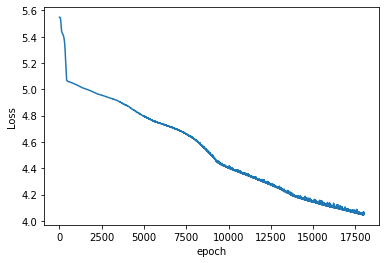

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [14]:
# TO EVALUATE THE ENTIRE TRAINING SET
with torch.no_grad():
    y_val = model(X_train)
    loss = torch.sqrt(criterion(y_val, y_train))
print(f'RMSE: {loss:.8f}')

RMSE: 16.52581406


## Validate the model
---
Here, we want to run the entire test set through the model, and compare it to the known value. <br>
For this step, we don't want to update weights and biases, so we set torch.no_grad()

In [15]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 23.66209984


In [16]:
# TO EVALUATE THE ENTIRE TRAINING SET
with torch.no_grad():
    y_val = model(X_train)
    loss = torch.sqrt(criterion(y_val, y_train))
print(f'RMSE: {loss:.8f}')

score = r2(y_train, y_val)
score

RMSE: 16.52581406


0.9279792237416864

In [17]:
## TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

score = r2(y_test, y_val)
score

RMSE: 23.66209984


0.8649676243867427

# Plot y-pred vs y-actual

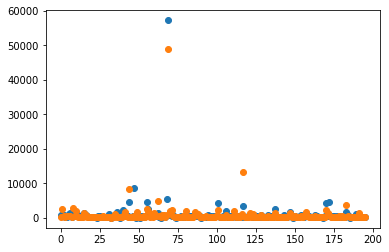

In [18]:
x = np.arange(0,196,1)
plt.scatter(x,y_val)
plt.scatter(x,y_test)